In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC,SVR,SVC,LinearSVR
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
powers = [1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4]
zoomed = np.array(range(1,101))

Using TensorFlow backend.


In [16]:
digit = pd.read_csv('Downloads/digit-recognizer/train.csv')

In [17]:
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
digit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [19]:
digit.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [20]:
digit.shape

(42000, 785)

In [21]:
digit.keys()

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [22]:
digit.drop(['label'],axis=1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
digit['label']

0        1
1        0
2        1
3        4
4        0
5        0
6        7
7        3
8        5
9        3
10       8
11       9
12       1
13       3
14       3
15       1
16       2
17       0
18       7
19       5
20       8
21       6
22       2
23       0
24       2
25       3
26       6
27       9
28       9
29       7
        ..
41970    2
41971    3
41972    4
41973    4
41974    3
41975    9
41976    2
41977    4
41978    4
41979    4
41980    7
41981    2
41982    8
41983    7
41984    3
41985    3
41986    0
41987    5
41988    0
41989    5
41990    3
41991    1
41992    9
41993    6
41994    4
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [24]:
digit['label'].shape

(42000,)

In [25]:
# x=digit.drop(['label'],axis=1)
# y=digit['label']

# x_train,y_train=x[0:130],y[0:130]
# y_test,y_test=x[130:],y[130:]

In [26]:
# X_train,X_test,y_train,y_test=train_test_split(x,y,
#                                                train_size=2000,
#                                                test_size=2000,
#                                               stratify=y,
#                                               random_state=42)

In [139]:
x=digit.drop(['label'],axis=1)
y=digit['label']

In [65]:
x=digit.drop(['label'],axis=1)

In [40]:
y=digit['label']

In [140]:
y_cat=to_categorical(y)

In [49]:
y_cat.shape

(42000, 10)

In [50]:
y_cat

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [146]:
model = Sequential()

model.add(Dense(256,activation='relu',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))



In [147]:
# print("input shape ",model.input_shape)
# print("output shape ",model.output_shape)

In [148]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [151]:
model.fit(x,y_cat,validation_split=0.3,shuffle=True,epochs=1000,callbacks=[EarlyStopping(patience=10)])

Train on 29399 samples, validate on 12601 samples
Epoch 1/1000
29399/29399 [==============================] - 6s 220us/step - loss: 8.4190 - acc: 0.4777 - val_loss: 8.3926 - val_acc: 0.4792
Epoch 2/1000
29399/29399 [==============================] - 8s 268us/step - loss: 8.5241 - acc: 0.4711 - val_loss: 8.6201 - val_acc: 0.4651
Epoch 3/1000
29399/29399 [==============================] - 9s 313us/step - loss: 8.7210 - acc: 0.4589 - val_loss: 8.4393 - val_acc: 0.4764
Epoch 4/1000
29399/29399 [==============================] - 9s 308us/step - loss: 8.4816 - acc: 0.4737 - val_loss: 8.4200 - val_acc: 0.4776
Epoch 5/1000
29399/29399 [==============================] - 9s 317us/step - loss: 8.4523 - acc: 0.4756 - val_loss: 8.3915 - val_acc: 0.4792
Epoch 6/1000
29399/29399 [==============================] - 9s 308us/step - loss: 8.4593 - acc: 0.4751 - val_loss: 8.4182 - val_acc: 0.4777
Epoch 7/1000
29399/29399 [==============================] - 10s 346us/step - loss: 8.5774 - acc: 0.4678 - val_

In [145]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_13 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                160       
Total params: 16,175
Trainable params: 16,175
Non-trainable params: 0
_________________________________________________________________


In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [99]:
train = pd.read_csv('Downloads/digit-recognizer/train.csv')
test = pd.read_csv('Downloads/digit-recognizer/test.csv')

In [100]:
Y_train = train["label"]

In [101]:
X_train = train.drop(labels = ["label"],axis = 1) 

In [102]:
del train

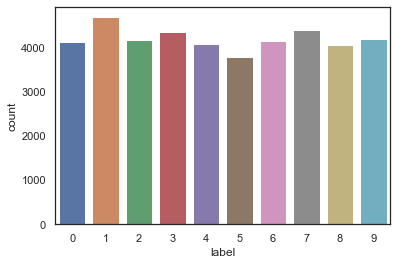

In [103]:
g = sns.countplot(Y_train)

In [104]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [105]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [106]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [107]:
X_train = X_train / 255.0

In [108]:
test = test / 255.0

In [109]:
X_train = X_train.values.reshape(-1,28,28,1)

In [110]:
test = test.values.reshape(-1,28,28,1)

In [111]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [112]:
random_seed = 2

In [130]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

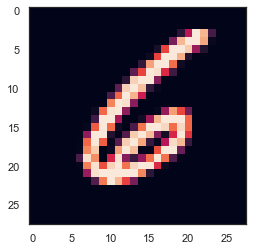

In [133]:
g = plt.imshow(X_train[0][:,:,0])

In [152]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [153]:
optimizer =RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [154]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=["accuracy"])

In [155]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [156]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [157]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 2)

Train on 21432 samples, validate on 2382 samples
Epoch 1/1
 - 101s - loss: 0.3749 - acc: 0.8786 - val_loss: 0.0782 - val_acc: 0.9765


In [158]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)


datagen.fit(X_train)

In [159]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/1
 - 102s - loss: 0.2637 - acc: 0.9201 - val_loss: 0.0525 - val_acc: 0.9853


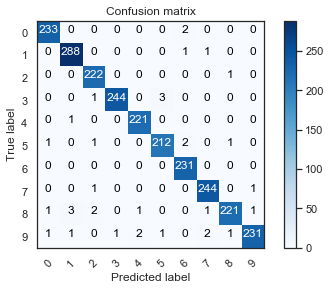

In [164]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                           cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = model.predict(X_val) 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

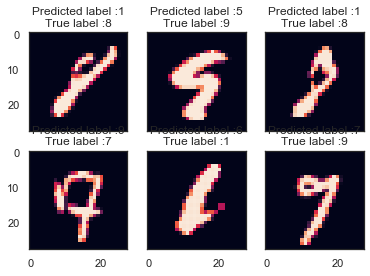

In [165]:
# Display some error results 

errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)
most_important_errors = sorted_dela_errors[-6:]
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [166]:
# predict results
results = model.predict(test)

results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [168]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)